In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline

import MITgcmutils as mit
import numpy as np
from scipy import signal
import seaborn as sns
import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')

In [2]:
outdir04 = '/Volumes/KYUUBI/SVB/05_448x512x100/04_feb_TSref/mnc_test_0001/'
outdir06 = '/Volumes/KYUUBI/SVB/05_448x512x100/06_aug_TSref/mnc_test_0001/'
outdir03 = '/Volumes/KYUUBI/SVB/05_448x512x100/03_feb/mnc_test_0001/'
outdir07 = '/Users/Karina/Tools/MITgcm/SVB/05_448x512x100/07_barotropic/mnc_test_0001/'

In [10]:
bat = mit.mnc.mnc_files(outdir04+'grid.t*.nc', layout='exch2')
depth = bat.variables['Depth'][:]
lat = bat.variables['Y'][:]
lon = bat.variables['X'][:]
Z = bat.variables['Z'][:]
Zl = bat.variables['Zl'][:]
# centers mask
hFacC = bat.variables['HFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
bat.close()

dyn = mit.mnc.mnc_files(outdir04+'dynVars.0000000000.t*.nc', layout='exch2')
Zind = (dyn.variables['diag_levels'][:]).astype(int)
dyn.close()

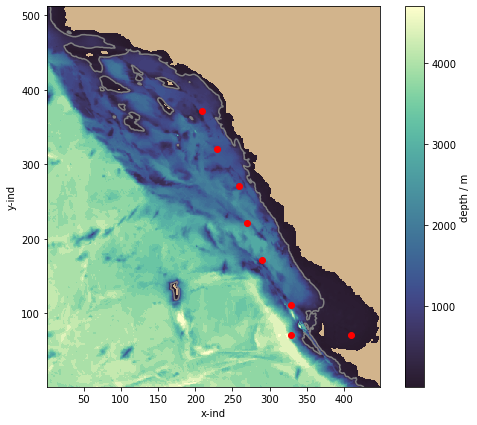

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255+128
lat_ind1 = 70
lat_ind2 = 120
lon_inds = [280+128,200+128,200+128,160+128,140+128,130+128,100+128,80+128]
lat_inds = [lat_ind1,lat_ind1, 110, lat_ind2+50,
            lat_ind2+100, lat_ind2+150, lat_ind2+200, lat_ind2+250]
# ssh transects
ax.plot(lon[lon_inds[0]],lat[lat_inds[0]],'ro')
ax.plot(lon[lon_inds[1]],lat[lat_inds[1]],'ro')
ax.plot(lon[lon_inds[2]],lat[lat_inds[2]],'ro')
ax.plot(lon[lon_inds[3]],lat[lat_inds[3]],'ro')
ax.plot(lon[lon_inds[4]],lat[lat_inds[4]],'ro')
ax.plot(lon[lon_inds[5]],lat[lat_inds[5]],'ro')
ax.plot(lon[lon_inds[6]],lat[lat_inds[6]],'ro')
ax.plot(lon[lon_inds[7]],lat[lat_inds[7]],'ro')

cb.set_label('depth / m')
ax.set_xlabel('x-ind')
ax.set_ylabel('y-ind')

ax.set_aspect(1)

#### Vertical velocity run04 vs run06

Vertical velocity at virtual stations and at 3 different depths. Dashed lines correpsond to run06 (August uniform stratification) and solid lines to (February uniform stratification)

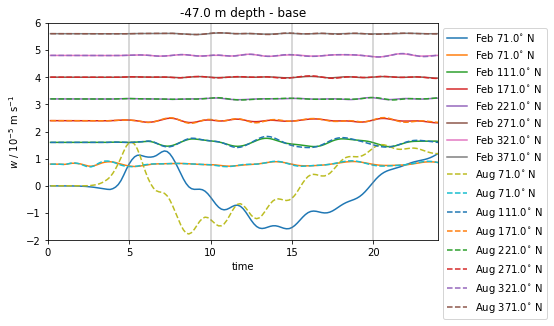

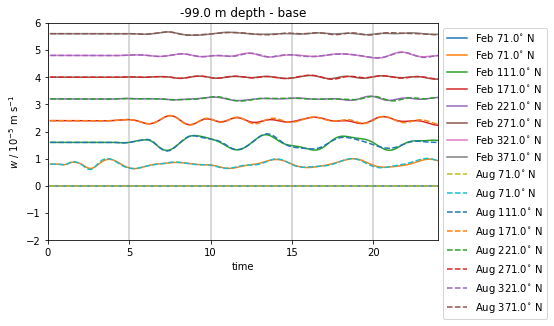

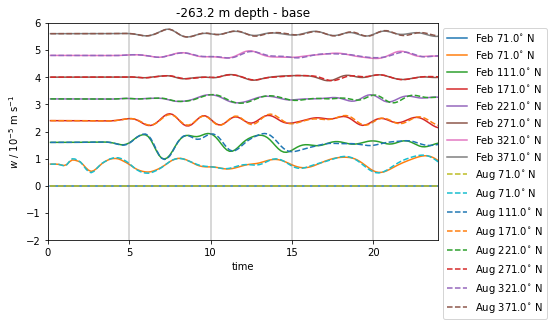

In [11]:
for zz in [15, 25, 43]:
    fig1, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)
    dyn = mit.mnc.mnc_files(outdir04+'dynVars.0000000000.t*.nc', layout='exch2')
    w1 = dyn.variables['WVEL'][:,zz,lat_inds[0],lon_inds[0]]
    time = dyn.variables['T'][:]
    w2 = dyn.variables['WVEL'][:,zz,lat_inds[1],lon_inds[1]]
    w3 = dyn.variables['WVEL'][:,zz,lat_inds[2],lon_inds[2]]
    w4 = dyn.variables['WVEL'][:,zz,lat_inds[3],lon_inds[3]]
    w5 = dyn.variables['WVEL'][:,zz,lat_inds[4],lon_inds[4]]
    w6 = dyn.variables['WVEL'][:,zz,lat_inds[5],lon_inds[5]]
    w7 = dyn.variables['WVEL'][:,zz,lat_inds[6],lon_inds[6]]
    w8 = dyn.variables['WVEL'][:,zz,lat_inds[7],lon_inds[7]]
    dyn.close()
    ws = [w1,w2,w3,w4,w5,w6,w7,w8]
    for w,ind,ii in zip(ws, lat_inds, range(len(ws))):
        ax1.plot(time/3600,(ii*0.8)+(w)*1E5, label=r'Feb %1.1f$^{\circ}$ N' %lat[ind])
    
    dyn = mit.mnc.mnc_files(outdir06+'dynVars.0000000000.t*.nc', layout='exch2')
    w1 = dyn.variables['WVEL'][:,zz,lat_inds[0],lon_inds[0]]
    time = dyn.variables['T'][:]
    w2 = dyn.variables['WVEL'][:,zz,lat_inds[1],lon_inds[1]]
    w3 = dyn.variables['WVEL'][:,zz,lat_inds[2],lon_inds[2]]
    w4 = dyn.variables['WVEL'][:,zz,lat_inds[3],lon_inds[3]]
    w5 = dyn.variables['WVEL'][:,zz,lat_inds[4],lon_inds[4]]
    w6 = dyn.variables['WVEL'][:,zz,lat_inds[5],lon_inds[5]]
    w7 = dyn.variables['WVEL'][:,zz,lat_inds[6],lon_inds[6]]
    w8 = dyn.variables['WVEL'][:,zz,lat_inds[7],lon_inds[7]]
    dyn.close()
    ws = [w1,w2,w3,w4,w5,w6,w7,w8]
    for w,ind,ii in zip(ws, lat_inds, range(len(ws))):
        ax1.plot(time/3600,(ii*0.8)+(w)*1E5,'--', label=r'Aug %1.1f$^{\circ}$ N' %lat[ind])

    for ii in range(5):
        ax1.axvline(5.*ii, color='0.5', alpha=0.4)
    ax1.set_ylabel('$w$ / 10$^{-5}$ m s$^{-1}$')
    ax1.set_xlabel('time')
    ax1.set_xlim(0,24)
    ax1.set_ylim(-2,6)
    ax1.legend(bbox_to_anchor=(1,1))
    ax1.set_title('%1.1f m depth - base' %(Zl[Zind[zz]]))
    plt.show()
  

#### Vertical velocity variance difference

In [12]:
zz = 8
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600

dyn = mit.mnc.mnc_files(outdir04+'dynVars.0000000000.t*.nc', layout='exch2')
W1 = dyn.variables['WVEL'][tini:,zz,:,:]
W2 = dyn.variables['WVEL'][tini:,zz2,:,:]
W3 = dyn.variables['WVEL'][tini:,zz3,:,:]
W4 = dyn.variables['WVEL'][tini:,zz4,:,:]
W5 = dyn.variables['WVEL'][tini:,zz5,:,:]
W6 = dyn.variables['WVEL'][tini:,zz6,:,:]
dyn.close()

Var1 = (np.sum(W1*W1, axis=0)*(dt))/(time[-1]-time[tini])
Var2 = (np.sum(W2*W2, axis=0)*(dt))/(time[-1]-time[tini])
Var3 = (np.sum(W3*W3, axis=0)*(dt))/(time[-1]-time[tini])
Var4 = (np.sum(W4*W4, axis=0)*(dt))/(time[-1]-time[tini])
Var5 = (np.sum(W5*W5, axis=0)*(dt))/(time[-1]-time[tini])
Var6 = (np.sum(W6*W6, axis=0)*(dt))/(time[-1]-time[tini])

dynb = mit.mnc.mnc_files(outdir06+'dynVars.0000000000.t*.nc', layout='exch2')
W1b = dynb.variables['WVEL'][tini:,zz,:,:]
W2b = dynb.variables['WVEL'][tini:,zz2,:,:]
W3b = dynb.variables['WVEL'][tini:,zz3,:,:]
W4b = dynb.variables['WVEL'][tini:,zz4,:,:]
W5b = dynb.variables['WVEL'][tini:,zz5,:,:]
W6b = dynb.variables['WVEL'][tini:,zz6,:,:]
dynb.close()

Var1b = (np.sum(W1b*W1b, axis=0)*(dt))/(time[-1]-time[tini])
Var2b = (np.sum(W2b*W2b, axis=0)*(dt))/(time[-1]-time[tini])
Var3b = (np.sum(W3b*W3b, axis=0)*(dt))/(time[-1]-time[tini])
Var4b = (np.sum(W4b*W4b, axis=0)*(dt))/(time[-1]-time[tini])
Var5b = (np.sum(W5b*W5b, axis=0)*(dt))/(time[-1]-time[tini])
Var6b = (np.sum(W6b*W6b, axis=0)*(dt))/(time[-1]-time[tini])

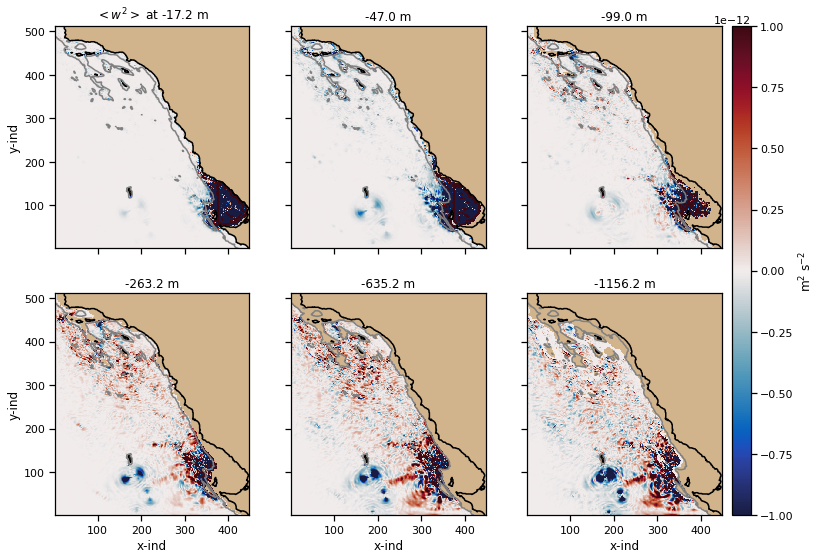

In [18]:
sns.set_context('notebook')
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(Var1-Var1b,mask=mask[zz,:,:]),
                   cmap=cmo.cm.balance,  vmin=-1E-12, vmax=1E-12)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(Var2-Var2b,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-12, vmax=1E-12)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(Var3-Var3b,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-12, vmax=1E-12)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(Var4-Var4b,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-12, vmax=1E-12)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(Var5-Var5b,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-12, vmax=1E-12)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(Var6-Var6b,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-12, vmax=1E-12)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=-1E-12, vmax=1E-12)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m$^2$ s$^{-2}$')

ax3.set_xlabel('x-ind')
ax4.set_xlabel('x-ind')
ax5.set_xlabel('x-ind')
ax0.set_ylabel('y-ind')
ax3.set_ylabel('y-ind')

ax0.set_title(r'$<{w^2}>$ at %1.1f m'%(Zl[zz]))
ax1.set_title('%1.1f m'%(Zl[Zind[zz2]]))
ax2.set_title('%1.1f m'%(Zl[Zind[zz3]]))
ax3.set_title('%1.1f m'%(Zl[Zind[zz4]]))
ax4.set_title('%1.1f m'%(Zl[Zind[zz5]]))
ax5.set_title('%1.1f m'%(Zl[Zind[zz6]]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
#plt.tight_layout()

#### Run04 - Run03

In [20]:
zz = 8
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600

dync = mit.mnc.mnc_files(outdir03+'dynVars.0000000000.t*.nc', layout='exch2')
W1c = dynb.variables['WVEL'][tini:,zz,:,:]
W2c = dynb.variables['WVEL'][tini:,zz2,:,:]
W3c = dynb.variables['WVEL'][tini:,zz3,:,:]
W4c = dynb.variables['WVEL'][tini:,zz4,:,:]
W5c = dynb.variables['WVEL'][tini:,zz5,:,:]
W6c = dynb.variables['WVEL'][tini:,zz6,:,:]
dync.close()

Var1c = (np.sum(W1c*W1c, axis=0)*(dt))/(time[-1]-time[tini])
Var2c = (np.sum(W2c*W2c, axis=0)*(dt))/(time[-1]-time[tini])
Var3c = (np.sum(W3c*W3c, axis=0)*(dt))/(time[-1]-time[tini])
Var4c = (np.sum(W4c*W4c, axis=0)*(dt))/(time[-1]-time[tini])
Var5c = (np.sum(W5c*W5c, axis=0)*(dt))/(time[-1]-time[tini])
Var6c = (np.sum(W6c*W6c, axis=0)*(dt))/(time[-1]-time[tini])

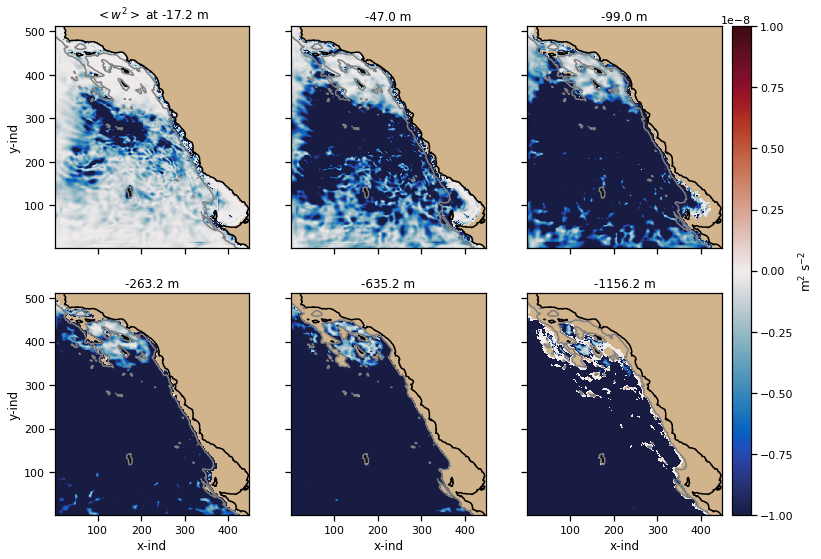

In [23]:
sns.set_context('notebook')
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(Var1-Var1c,mask=mask[zz,:,:]),
                   cmap=cmo.cm.balance,  vmin=-1E-8, vmax=1E-8)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(Var2-Var2c,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-8, vmax=1E-8)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(Var3-Var3c,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-8, vmax=1E-8)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(Var4-Var4c,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-8, vmax=1E-8)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(Var5-Var5c,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-8, vmax=1E-8)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(Var6-Var6c,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.balance,  vmin=-1E-8, vmax=1E-8)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=-1E-8, vmax=1E-8)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m$^2$ s$^{-2}$')

ax3.set_xlabel('x-ind')
ax4.set_xlabel('x-ind')
ax5.set_xlabel('x-ind')
ax0.set_ylabel('y-ind')
ax3.set_ylabel('y-ind')

ax0.set_title(r'$<{w^2}>$ at %1.1f m'%(Zl[zz]))
ax1.set_title('%1.1f m'%(Zl[Zind[zz2]]))
ax2.set_title('%1.1f m'%(Zl[Zind[zz3]]))
ax3.set_title('%1.1f m'%(Zl[Zind[zz4]]))
ax4.set_title('%1.1f m'%(Zl[Zind[zz5]]))
ax5.set_title('%1.1f m'%(Zl[Zind[zz6]]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
#plt.tight_layout()